##### Import Libraries

In [8]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

##### Load Data

In [9]:
df = pd.read_csv("cancer.csv")         # Reading the dataset to Data Frame

##### Explore Data

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.shape

(569, 33)

In [12]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The statistics about the dataset

In [14]:
y=df["diagnosis"]                                                     # predict this (Dependent Variable)
x=df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])  # Independent Variables


Split the Dataset for Testing and Training

In [17]:
#random_state should be some arbitary number, this ensures same dataset (i.e., 70% data) is sent in every iteration and results will be same
#stratify indicates randomness to dataset, this will ensure that dataset shuffled during split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=df.diagnosis)


In [19]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,...,18.76,21.98,124.30,1070.0,0.1435,0.4478,0.4956,0.1981,0.3019,0.09124
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.1054,0.3387,0.09638
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.3089,0.2604,0.1397,0.3151,0.08473


In [20]:
x_train.shape

(398, 30)

In [21]:
y_train.value_counts()

B    250
M    148
Name: diagnosis, dtype: int64

### Train the model

In [22]:
# Here max depth indicates Levels in Binary Tree
# This value we have to do trail and error until training accuracy becomes 1

In [43]:
tree_clf = DecisionTreeClassifier(max_depth=8)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [44]:
tree_clf.classes_

array(['B', 'M'], dtype=object)

In [45]:
export_graphviz(
                 tree_clf,
                 out_file="cancer.dot",
                 feature_names=x.columns,
                 class_names=tree_clf.classes_,
                 rounded=True,
                 filled=True
                )

You can visualize the dot file at <a href="http://www.webgraphviz.com" target="_blank">www.webgraphviz.com</a>

### Accuracy of the model:

In [46]:
print("Training set accuracy: {:.3f}".format(tree_clf.score(x_train, y_train)))
print("Testing set accuracy: {:.3f}".format(tree_clf.score(x_test, y_test)))

Training set accuracy: 1.000
Testing set accuracy: 0.889


In [47]:
actual = y_test
predicted = tree_clf.predict(x_test)

In [48]:
actual == predicted

448     True
346     True
568     True
411     True
519     True
       ...  
74      True
39      True
99     False
115     True
219     True
Name: diagnosis, Length: 171, dtype: bool

### Test the Model

In [49]:
tree_clf.feature_importances_

array([0.01721081, 0.01882432, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00922008, 0.0152985 ,
       0.        , 0.        , 0.        , 0.01749779, 0.00148665,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02985742, 0.7200599 , 0.00717117, 0.01034619,
       0.0158869 , 0.        , 0.10482181, 0.0203665 , 0.01195195])

In [50]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [51]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

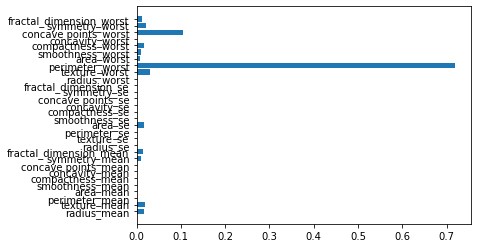

In [52]:
plt.barh(x.columns,tree_clf.feature_importances_)